# LSTM
Long Short Term Memory

### Import the required packages

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as KL
import matplotlib.pyplot as plt

### Get the dataset

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

### Create the model

In [4]:
inputs = KL.Input(shape=(28, 28))
x = KL.LSTM(64, activation='relu')(inputs)
outputs = KL.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer="adam",
 loss="sparse_categorical_crossentropy",
 metrics=["acc"])

### Training the model

In [6]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.6178 - acc: 0.7965
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1615 - acc: 0.9507
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1156 - acc: 0.9650
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0887 - acc: 0.9732
Epoch 5/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0735 - acc: 0.9768


### Plotting the accuracy and loss

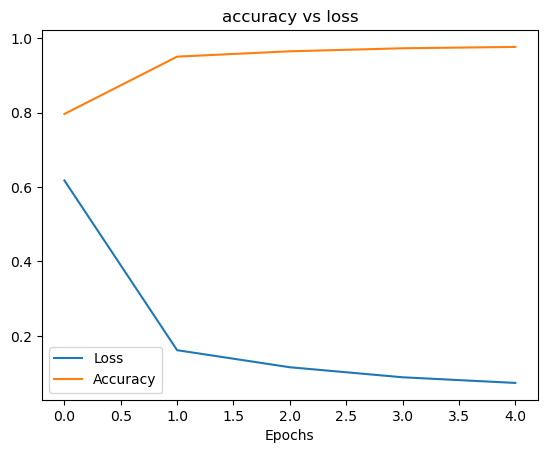

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title("accuracy vs loss")
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])

### Printing the metrics

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.0567 - acc: 0.9819
Loss: 0.05665970593690872 - Acc: 0.9818999767303467
